In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

Preprocessing

In [2]:
senti = pd.read_csv('Sentiment_Predicted.csv')
senti.drop(columns=['Unnamed: 0'],inplace=True)
senti = senti[senti['like']!='like']
senti['predicted_label']-=1

In [3]:
senti['like'] = pd.to_numeric(senti['like'])
senti['rt'] = pd.to_numeric(senti['rt'])
senti['vote'] = senti['like']+senti['rt']
senti['weight'] = senti['vote'].apply(lambda x:np.log10(x)) #Weight formula

In [4]:
senti['average_sent'] = senti['weight']*senti['predicted_label']
senti['date'] = pd.to_datetime(senti['date'])
senti_final = senti.groupby('date').sum()

In [5]:
spy = yf.Ticker('SPY')
df = spy.history(start='2022-02-11',end='2022-04-24')
df['change'] = (df['Close'] - df['Open'])/df['Open']*100

Date offset

In [6]:
df['pre'] = df.index-pd.tseries.offsets.DateOffset(0)

In [7]:
merged = pd.merge(df,senti_final,left_on='pre',right_index=True)

In [8]:
merged

,Open,High,Low,Close,Volume,Dividends,Stock Splits,change,pre,like,rt,predicted_label,vote,weight,average_sent
Date,,,,,,,,,,,,,,,
2022-02-11,448.018180,450.211349,437.580605,439.095886,153214600,0.000,0,-1.991503,2022-02-11,12910,3465,72,16375,599.903416,69.663210
2022-02-14,438.557576,440.232366,433.991744,437.660339,123006300,0.000,0,-0.204588,2022-02-14,15280,8354,81,23634,664.883094,96.118478
2022-02-15,442.355790,444.897880,441.807475,444.718445,88482700,0.000,0,0.534107,2022-02-15,12490,3545,137,16035,620.503357,106.136274
2022-02-16,442.555144,446.672358,440.571317,445.216888,84863600,0.000,0,0.601449,2022-02-16,8805,3389,138,12194,544.937546,125.370486
2022-02-17,441.847347,445.186978,435.068419,435.706421,102259100,0.000,0,-1.389830,2022-02-17,12788,3187,115,15975,707.558335,72.320859
2022-02-18,435.975568,437.301466,430.482653,432.885193,132642900,0.000,0,-0.708841,2022-02-18,17529,4336,85,21865,557.639866,65.093769
2022-02-23,431.320041,431.918189,420.045071,420.643219,132578000,0.000,0,-2.475383,2022-02-23,14872,3162,48,18034,810.719793,55.089040
2022-02-24,409.747059,427.432139,409.368261,426.973541,213942900,0.000,0,4.204175,2022-02-24,18064,3639,57,21703,907.257644,37.107667
2022-02-25,428.279482,436.484005,426.534902,436.394287,121804500,0.000,0,1.894745,2022-02-25,17375,3033,115,20408,620.172387,115.648329


Training & Plotting

In [9]:
from matplotlib import pyplot as plt
print('Correlation:',np.correlate(merged['average_sent']/merged['weight'],merged['change']))
x = np.array(merged['average_sent']/merged['weight'])
y = np.array(merged['change'])

Correlation: [0.53439082]


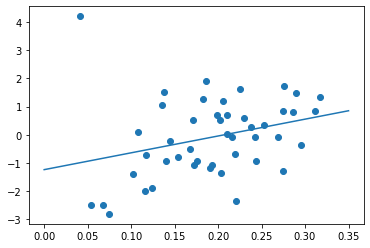

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y.reshape(-1,1))
ls = np.linspace(0,0.35,100).reshape(-1,1)
pred = lr.predict(ls)
plt.plot(ls,pred)
plt.scatter(merged['average_sent']/merged['weight'],merged['change']);

In [11]:
init = 1
cor = 0
for d in merged.index:
    if lr.predict(np.array(merged['average_sent'][d]/merged['weight'][d]).reshape(-1,1)) > 0:
        init *= (1+merged['change'][d]/100)
        if merged['change'][d]>0:
            cor+=1
    else:
        init *= (1-merged['change'][d]/100)
        if merged['change'][d]<0:
            cor+=1
print('Final account value:',init)

Final account value: 1.1395710828226253


In [12]:
accuracy = cor/len(merged)
accuracy

0.6086956521739131

In [13]:
init = 1
for d in merged.index:
    init *= (1+merged['change'][d]/100)
init

0.9563284116886496